In [149]:
# getting all libraires


import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
# download path added 

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.path.join("datasets", "housing")
housing_url = download_root + "datasets/housing/housing.tgz"

In [35]:
def fetch_housing_data(housing_url=housing_url,housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=os.getcwd())
    housing_tgz.close()
    


In [36]:
def load_housing_data(housing_path=housing_path):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [37]:
# the below two commands did not work 

#fetch_housing_data()
#housing = load_housing_data()

In [38]:
# reading directly
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
# using info method to see the number of rows and type of data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
# finding the categories for ocean_proximity
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [44]:
# describe method to see the values of numerical types
# null values are ignored
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


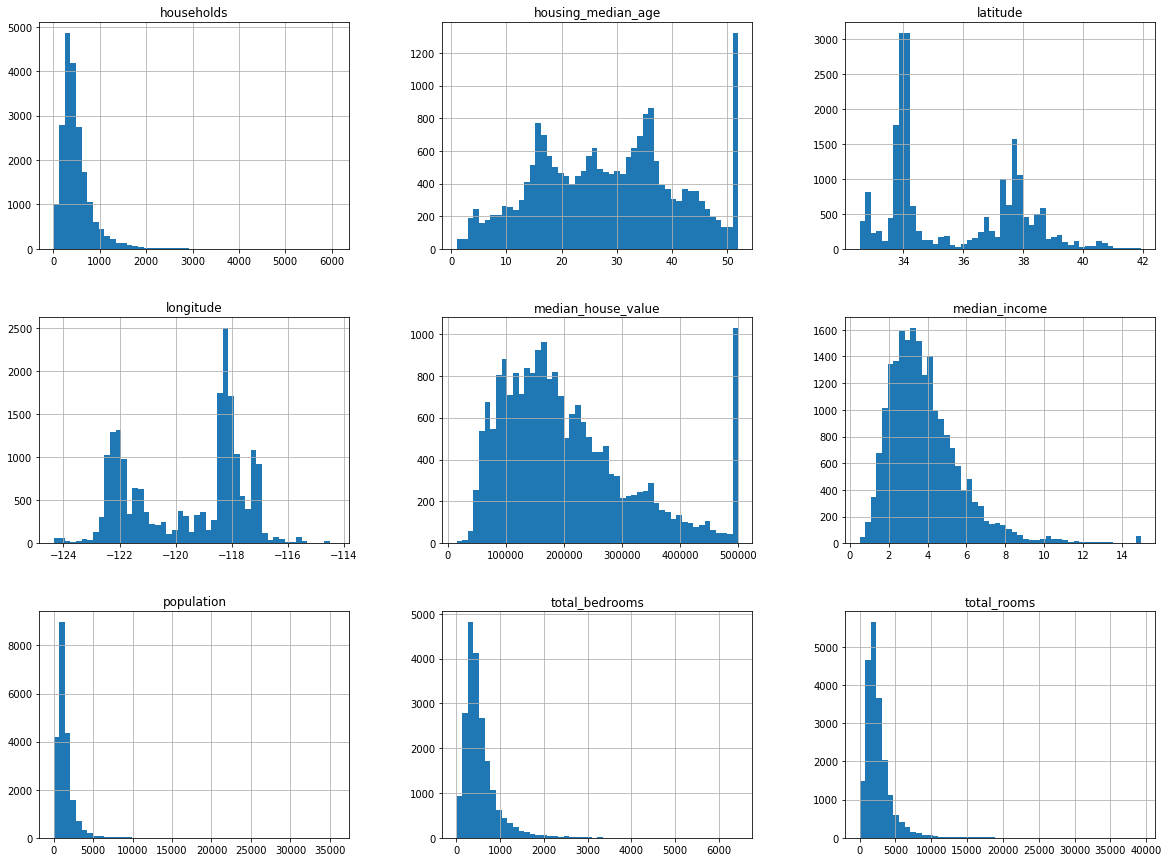

In [46]:
# histogram to see the distribution of numerical variables
%matplotlib inline

housing.hist(bins=50, figsize=(20,15))

# optional

plt.show()


In [48]:
# Creating a train test function 

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [56]:
train_set, test_set = split_train_test(housing,0.2)

In [58]:
# now using scikit learns split functions
# comes with random_state 

train_test, test_set = train_test_split(housing,test_size = 0.2, random_state = 420)


In [59]:
# creating stratified sampling 
# based on median_income as possible stratifier

housing["income_cat"] = pd.cut(housing['median_income'],
                              bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])

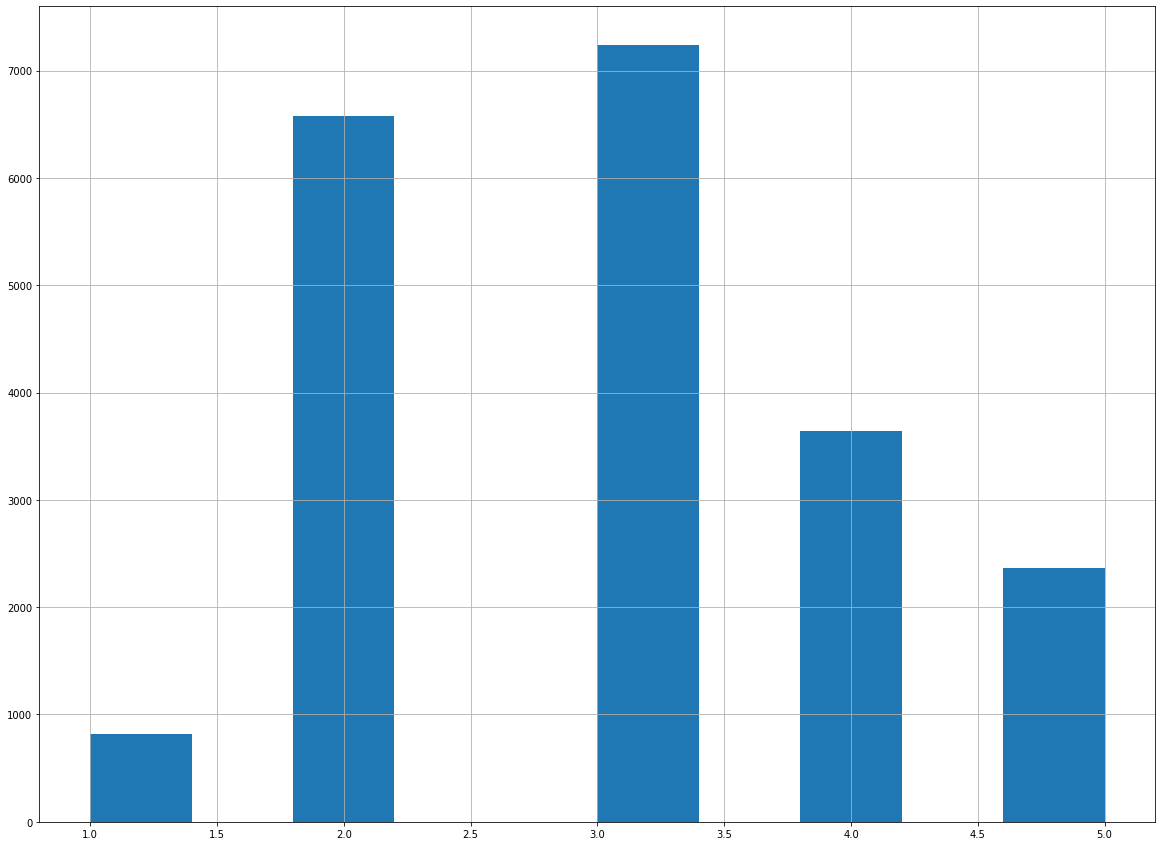

In [73]:
housing['income_cat'].hist(figsize=(20,15))

In [64]:
# stratified sampling based on income category

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=420)

for train_index , test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [66]:
strat_test_set.shape

(4128, 11)

In [67]:
strat_train_set.shape

(16512, 11)

In [69]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [70]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [71]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [72]:
# now remove the income cat from both datasets

for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [75]:
# not going to look at test set now
# will copy the training set as housing 

housing = strat_train_set.copy()

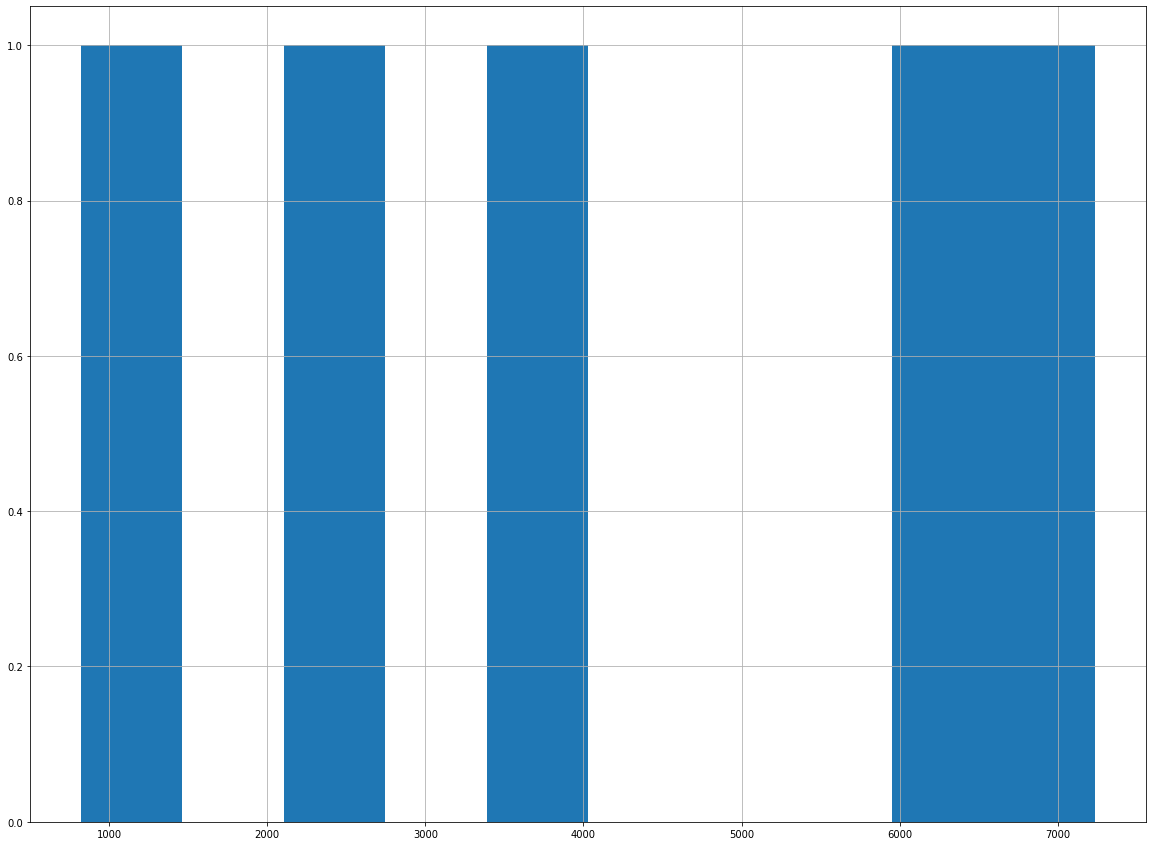

In [74]:
housing['income_cat'].value_counts().hist(figsize=(20,15))

# Visulization

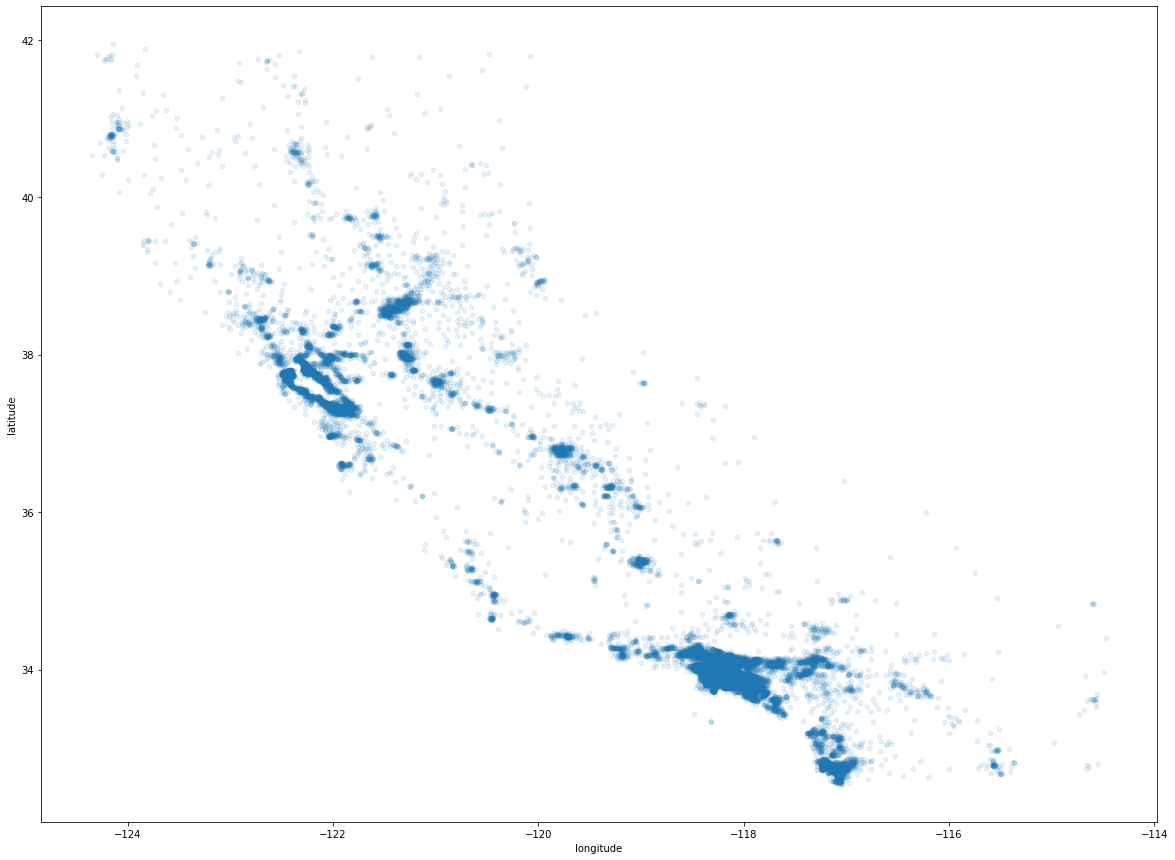

In [79]:
# geographical 
# added alpha to make plot thicker

housing.plot(kind="scatter", x = "longitude", y = "latitude", figsize=(20,15), alpha=0.1)

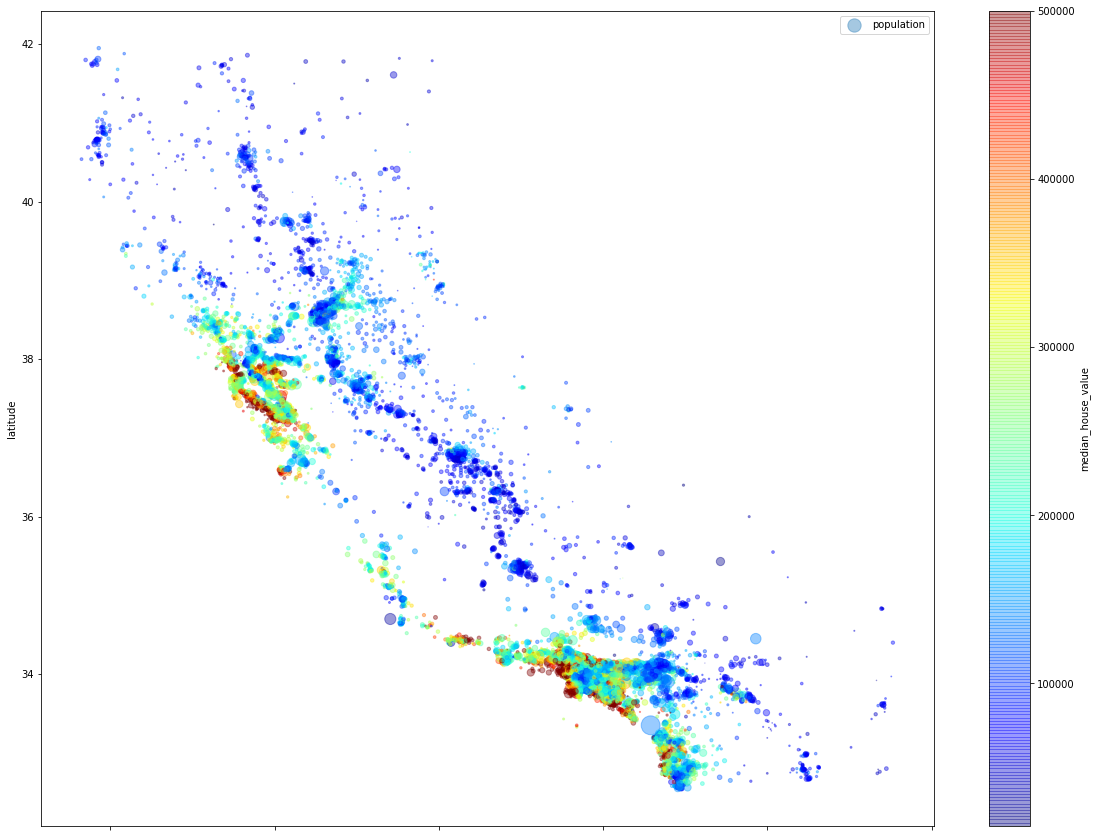

In [82]:
# housing price 

housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha =0.4, 
            s=housing["population"]/100, label = "population", figsize=(20,15),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True)

plt.legend()

In [83]:
corr_matrix = housing.corr()

In [86]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686551
total_rooms           0.135085
housing_median_age    0.104876
households            0.064063
total_bedrooms        0.047400
population           -0.026337
longitude            -0.046365
latitude             -0.142313
Name: median_house_value, dtype: float64

In [88]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

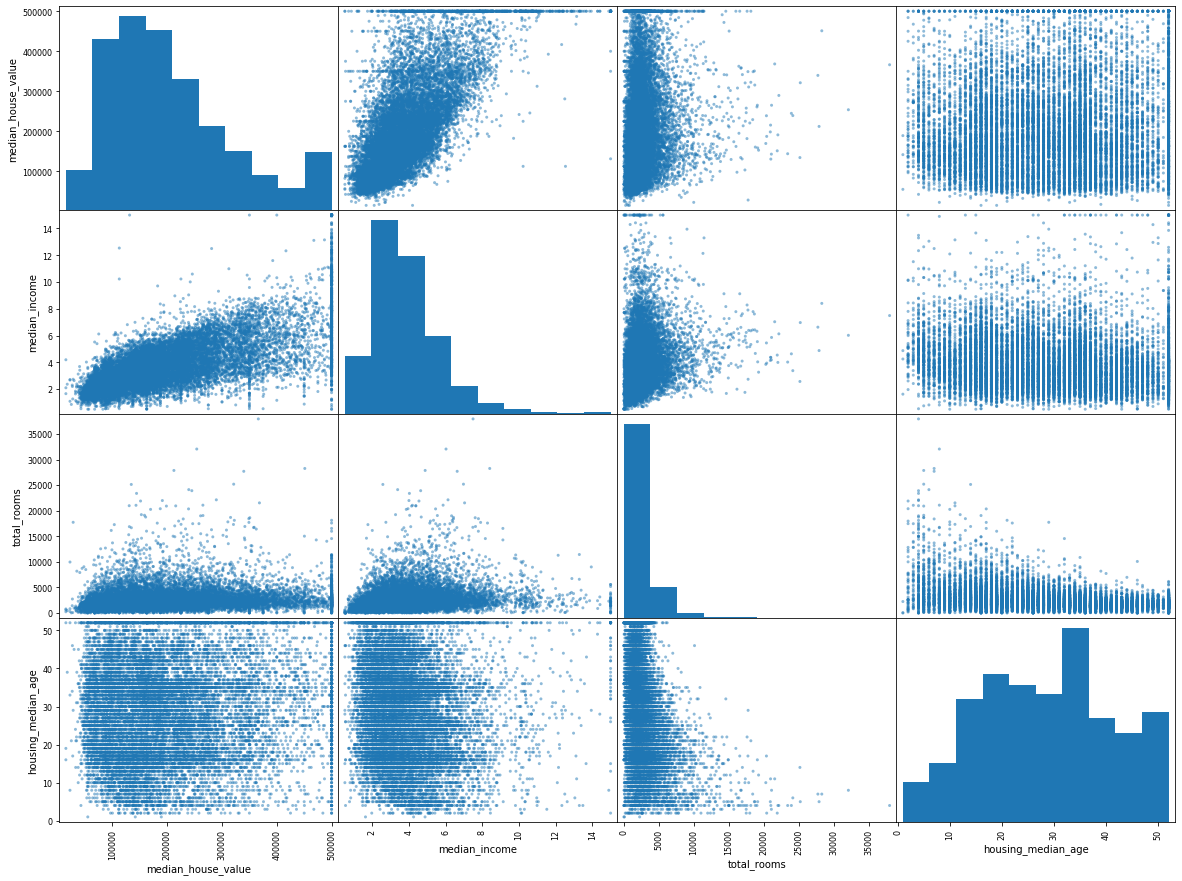

In [90]:
scatter_matrix(housing[attributes], figsize=(20,15))
plt.show()

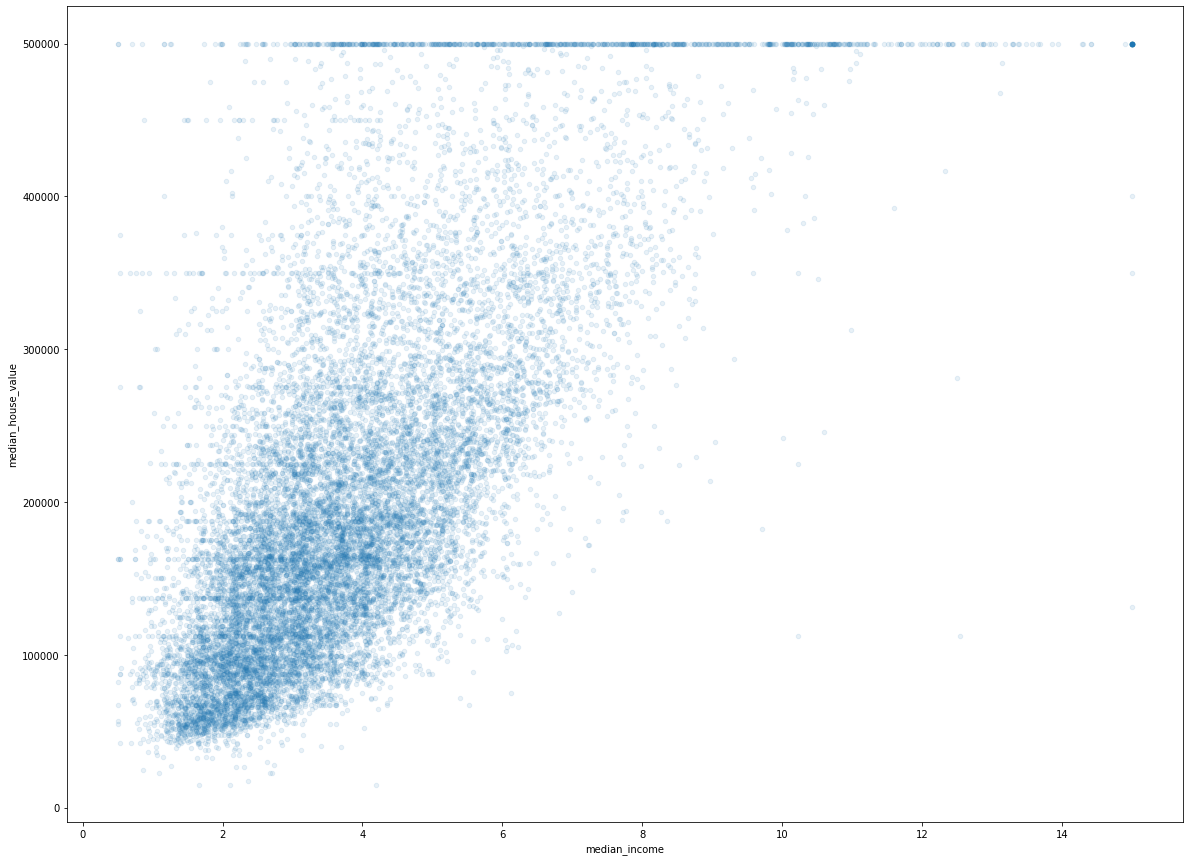

In [92]:
housing.plot(kind="scatter", x = "median_income", y = "median_house_value", alpha=0.1, figsize=(20,15))

In [93]:
# creating few variables from already existing variables

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedroom_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [94]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedroom_per_room,population_per_household
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN,4.481481,0.206612,2.481481
6716,-118.15,34.13,30.0,2763.0,520.0,1143.0,465.0,4.7298,500001.0,<1H OCEAN,5.941935,0.188201,2.458065
11270,-117.99,33.78,15.0,4273.0,993.0,2300.0,946.0,3.5313,213000.0,<1H OCEAN,4.516913,0.232389,2.431290
5906,-118.43,34.30,28.0,271.0,61.0,246.0,62.0,1.7062,164600.0,<1H OCEAN,4.370968,0.225092,3.967742
16667,-120.68,35.26,26.0,1704.0,315.0,918.0,310.0,3.2464,208000.0,NEAR OCEAN,5.496774,0.184859,2.961290


In [95]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686551
rooms_per_household         0.150120
total_rooms                 0.135085
housing_median_age          0.104876
households                  0.064063
total_bedrooms              0.047400
population                 -0.026337
population_per_household   -0.031661
longitude                  -0.046365
latitude                   -0.142313
bedroom_per_room           -0.254606
Name: median_house_value, dtype: float64

In [96]:
# cleaning variables

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [107]:
# missing features
# replacing total_bedroom missing values with its median

housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis = 1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [108]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 20502 to 19640
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [117]:
# Can also use sklean's SimpleImputer to replace the value
# first we need to create an instance

imputer = SimpleImputer(strategy="median")

# since the median works only on the numeric attibutes

housing_num = housing.drop("ocean_proximity", axis=1)

In [119]:
imputer.fit(housing_num)

X = imputer.transform(housing_num)

In [124]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [126]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 20502 to 19640
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [128]:
# Dealing with categorical attributes

housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
20502,<1H OCEAN
6716,<1H OCEAN
11270,<1H OCEAN
5906,<1H OCEAN
16667,NEAR OCEAN


In [130]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [131]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.]])

In [132]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [134]:
cat_encoder = OneHotEncoder()

In [136]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [138]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [139]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [140]:
# Custom Transformation

from sklearn.base import BaseEstimator, TransformerMixin

In [141]:
room_ix, bedroom_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,room_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix] / X[:,room_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household,population_per_household]

In [143]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [144]:
attr_adder

CombinedAttributesAdder(add_bedrooms_per_room=False)

In [145]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [148]:
housing_extra_attribs

array([[-118.68, 34.33, 45.0, ..., '<1H OCEAN', 4.481481481481482,
        2.4814814814814814],
       [-118.15, 34.13, 30.0, ..., '<1H OCEAN', 5.941935483870968,
        2.458064516129032],
       [-117.99, 33.78, 15.0, ..., '<1H OCEAN', 4.516913319238901,
        2.431289640591966],
       ...,
       [-121.4, 38.59, 25.0, ..., 'INLAND', 4.632016632016632,
        2.3492723492723493],
       [-115.5, 32.67, 35.0, ..., 'INLAND', 4.545263157894737,
        3.566315789473684],
       [-120.79, 37.53, 20.0, ..., 'INLAND', 5.387832699619772,
        3.2433460076045626]], dtype=object)

In [150]:
## Feature Scaling

In [153]:
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder(add_bedrooms_per_room=False)),
    ('std_scaler',StandardScaler())
])

In [154]:
housing_num_tr = num_pipline.fit_transform(housing_num)

In [155]:
housing_num_tr

array([[ 0.44067455, -0.60703741,  1.29192274, ..., -0.46779365,
        -0.39512015, -0.08453148],
       [ 0.7051957 , -0.70092663,  0.10283974, ...,  0.45604995,
         0.21531541, -0.08817279],
       [ 0.78505115, -0.86523277, -1.08624326, ..., -0.17748358,
        -0.38031048, -0.09233626],
       ...,
       [-0.91686801,  1.39280295, -0.29352126, ..., -0.70344593,
        -0.33219999, -0.10508987],
       [ 2.0278015 , -1.38631793,  0.49920074, ..., -0.89305667,
        -0.36846091,  0.08415921],
       [-0.61241913,  0.89519009, -0.68988226, ..., -0.29536258,
        -0.01628657,  0.03393772]])